In [1]:
import xarray as xr
import numpy as np
import pei.myfunctions as mf
from xhistogram.xarray import histogram
from dask.diagnostics import ProgressBar

In [12]:
# Load WBT data
ds = xr.open_mfdataset('../data/processed/WBTdaily/WBTdailyens*.nc',combine='nested',concat_dim='ensemble',chunks={'time':1095})

# Load area data
land_area = xr.open_dataset('../data/processed/wbt.land_area')
land_mask = np.isfinite(land_area)

# Reduce WBT data
ds_adj = ds['WBT'].where(land_mask,drop=True).rename({'__xarray_dataarray_variable__':'WBT'})

In [14]:
# Get WBT
var = ds_adj['WBT']

# Bins to divide data at each point in time
bins = np.arange(-52,35,0.1)

In [7]:
for year in range(1980,2101):
    var_year = var.where(var['time.year']==year,drop=True)
    # Histogram in time dimension for this year
    dist = histogram(var_year,bins=[bins],dim=['time'])
    #dist.to_netcdf('../data/processed/WBTyearly/WBT'+str(year)+'.nc')

In [15]:
var_year = var.where(var['time.year']==1980,drop=True)
# Histogram in time dimension for this year
dist = histogram(var_year,bins=[bins],dim=['time'])

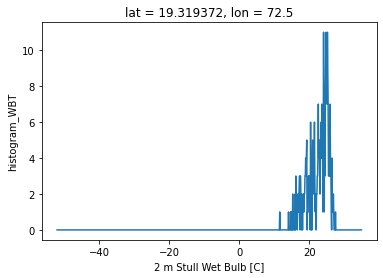

In [16]:
dist.isel(ensemble=1).sel(lat=19,lon=72,method='nearest').plot()

In [18]:
dist

<xarray.DataArray 'histogram_WBT' (ensemble: 5, lat: 179, lon: 288, WBT_bin: 869)>
dask.array<reshape, shape=(5, 179, 288, 869), dtype=int64, chunksize=(1, 179, 288, 869), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 83.403145 84.34555
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * WBT_bin  (WBT_bin) float64 -51.95 -51.85 -51.75 -51.65 ... 34.65 34.75 34.85
Dimensions without coordinates: ensemble